# Temperature Prediction

## Objective
Predict the **temperature** based on humidity data.


## Dataset Overview
The dataset contains hourly or daily readings of humidity and temperature.


## Workflow
1. Load the dataset  
2. Explore and clean the data  
3. Train a regression model  
4. Evaluate predictions


In [13]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Load the dataset
df = pd.read_csv("E:\\Skillfied mentor\\downloaded-file\\humidity.csv")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701548 entries, 0 to 701547
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sensor_id    701548 non-null  int64  
 1   lat          701548 non-null  float64
 2   lon          701548 non-null  float64
 3   pressure     701548 non-null  float64
 4   temperature  701548 non-null  float64
 5   humidity     701548 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 32.1 MB


,sensor_id,lat,lon,pressure,temperature,humidity
0,2266,42.738,23.272,95270.27,23.46,62.48
1,2292,42.663,23.273,94355.83,23.06,59.46
2,3096,42.700,23.360,95155.81,26.53,44.38
3,3428,42.624,23.406,94679.57,28.34,38.28
4,3472,42.669,23.318,94327.88,26.31,46.37


In [4]:
#Checking skweness
df["pressure"].skew()

np.float64(-14.893978255311966)

In [14]:
#Checking skweness
df["temperature"].skew()

np.float64(-9.392075144033432)

In [15]:
#Checking skweness
df["humidity"].skew()

np.float64(-0.12247113915034959)

## Exploratory Data Analysis


In [5]:
# Check for missing values
df.isnull().sum()



sensor_id      0
lat            0
lon            0
pressure       0
temperature    0
humidity       0
dtype: int64

In [6]:
# Display summary statistics
df.describe()

,sensor_id,lat,lon,pressure,temperature,humidity
count,701548.000000,701548.000000,701548.000000,701548.000000,701548.000000,701548.000000
mean,2835.419842,42.679722,23.333739,94965.292500,24.754990,48.348949
std,798.018890,0.025568,0.039365,2577.210945,14.013001,20.907247
min,1764.000000,42.622000,23.240000,0.000000,-145.120000,0.000000
25%,2224.000000,42.665000,23.310000,94528.017500,20.630000,34.140000
50%,2323.000000,42.685000,23.332000,95005.480000,24.780000,48.350000
75%,3474.000000,42.694000,23.360000,95405.132500,29.870000,62.940000
max,4661.000000,42.738000,23.419000,164926.750000,61.170000,100.000000


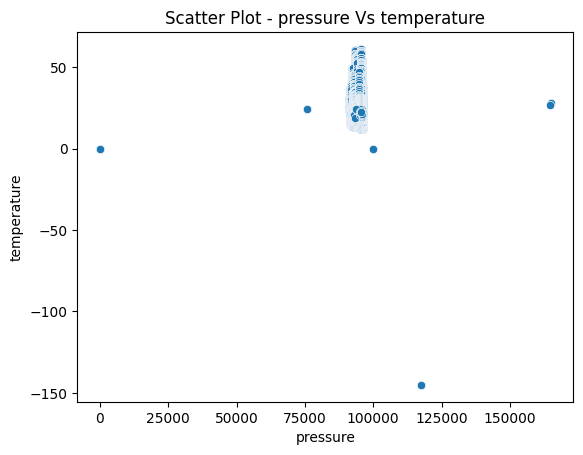

In [7]:
# Scatter plot to observe relationship >> pressure	temperature	humidity
sns.scatterplot(data=df, x='pressure', y='temperature')
plt.title("Scatter Plot - pressure Vs temperature")
plt.show()

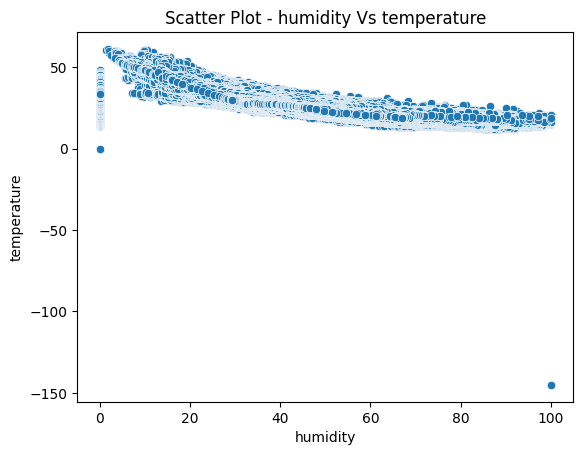

In [8]:
sns.scatterplot(data=df, x='humidity', y='temperature')
plt.title("Scatter Plot - humidity Vs temperature")
plt.show()

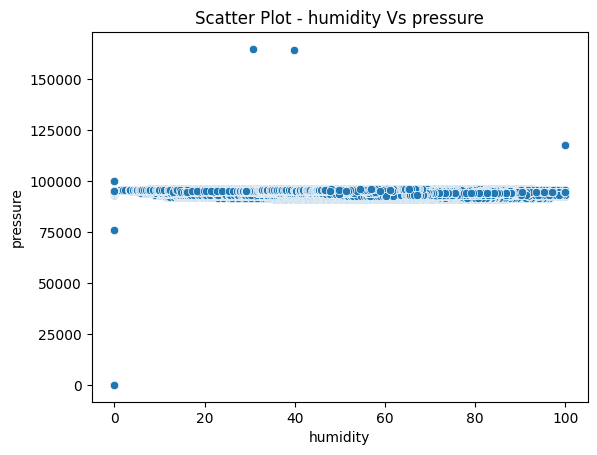

In [9]:
sns.scatterplot(data=df, x='humidity', y='pressure')
plt.title("Scatter Plot - humidity Vs pressure")
plt.show()

## Data Preprocessing

In [16]:
# Drop any rows with missing values
#There is no null value in the given data however the belo link can be use to drop a null value
#df_cleaned = df.dropna()

# Define features and target
X = df[['humidity', 'temperature', 'pressure', 'lat', 'lon']]
y = df['sensor_id']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the result
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)
print("Training set size:", y_train.shape)
print("Testing set size:", y_test.shape)

Training set size: (561238, 5)
Testing set size: (140310, 5)
Training set size: (561238,)
Testing set size: (140310,)


## Model Training

In [18]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

y_pred

array([2649.48094317, 2884.99551129, 2706.29591859, ..., 2854.51658493,
       2829.99212997, 2769.61455549], shape=(140310,))

## Evaluation


In [19]:
# Evaluate model performance
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 614980.8720219246
R² Score: 0.03679309520895857


## Conclusion
- A simple linear regression model was used to predict temperature from humidity.  
- Consider using polynomial regression or time-series models for more complex patterns.


When simple linear regression struggles to capture the relationship between humidity and temperature, it often indicates that the relationship isn't strictly linear. Here’s how we can improve our model based on the suggestion:
1. Try Polynomial Regression
2. Try time-series models

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Degree=2 means quadratic; we can try 3 or more if needed
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train[['humidity']], y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [23]:
# Predict
y_pred_poly = poly_model.predict(X_test[['humidity']])
y_pred_poly


array([2745.82153303, 2944.95119523, 2730.47522208, ..., 2870.60420675,
       2873.77894667, 2768.05636773], shape=(140310,))

In [24]:
#Evaluation
from sklearn.metrics import mean_squared_error
print("Polynomial MSE:", mean_squared_error(y_test, y_pred_poly))

Polynomial MSE: 618963.8735077862
